## 导入噪声模型

这里使用FakeSingaporeV2的量子系统

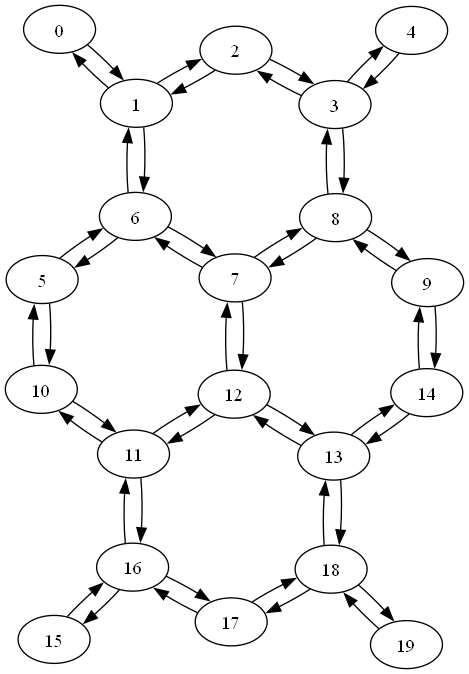

In [1]:
# For simulation
from qiskit_aer import AerSimulator
from qiskit.providers.fake_provider import FakeSingaporeV2

backend = AerSimulator.from_backend(FakeSingaporeV2())

backend.coupling_map.draw()

查看比特的性质，T1和T2时间。

In [2]:
backend

AerSimulator(''aer_simulator(fake_singapore)'
             noise_model=<NoiseModel on ['id', 'u2', 'cx', 'u3', 'measure']>)

尝试进行Interleaved RB。

In [3]:
import numpy as np
from qiskit_experiments.library import InterleavedRB
import qiskit.circuit.library as circuits

def interleaved_rb_QEC(backend, lengths, num_samples, seed):
    
    num_qubits = backend.num_qubits
    
    
    # get couple map for cnot
    coordinate_pairs = backend.coupling_map.get_edges()
    unique_pairs = []
    for pair in coordinate_pairs:
        # 检查反转的边是否已经存在
        if (pair[1], pair[0]) not in unique_pairs:
            # 如果不存在，将边添加到集合中
            unique_pairs.append(pair)
    
    # for H gate
    h_gate_error = {}
    id_gate_error = {}
    cx_gate_error = {}
    
    qec_basis_gate = ['h', 'id', 'cx']
    
    for gate in qec_basis_gate:
        print(f"{gate}")
        if gate == 'h':
            for qubit_id in range(num_qubits):
                qubits = (qubit_id,)
                int_exp2 = InterleavedRB(
                    circuits.HGate(), qubits, lengths, num_samples=num_samples, seed=seed)
                int_expdata2 = int_exp2.run(backend).block_for_results()
                int_results2 = int_expdata2.analysis_results()
                h_gate_error[qubit_id] = int_results2[2].value
                print(f"{qubit_id}_")
        elif gate == 'id':
            for qubit_id in range(num_qubits):
                qubits = (qubit_id,)
                int_exp2 = InterleavedRB(circuits.IGate(), qubits, lengths, num_samples=num_samples, seed=seed)
                int_expdata2 = int_exp2.run(backend).block_for_results()
                int_results2 = int_expdata2.analysis_results()
                id_gate_error[qubit_id] = int_results2[2].value
                print(f"{qubit_id}_")
        elif gate == 'cx':
            for qubit_pairs in unique_pairs:
                int_exp2 = InterleavedRB(circuits.CXGate(), qubit_pairs, lengths, num_samples=num_samples, seed=seed)
                int_expdata2 = int_exp2.run(backend).block_for_results()
                int_results2 = int_expdata2.analysis_results()
                cx_gate_error[qubit_pairs] = int_results2[2].value
                print(f"{qubit_pairs}_")
                
    return h_gate_error, id_gate_error, cx_gate_error, unique_pairs

lengths = np.arange(1, 121+1, 30)
num_samples = 10
seed = 1010
h_gate_error, id_gate_error, cx_gate_error, unique_pairs = interleaved_rb_QEC(backend, lengths, num_samples, seed)

h
0_
1_
2_
3_
4_
5_
6_
7_
8_
9_
10_
11_
12_
13_
14_
15_
16_
17_
18_
19_
id
0_
1_
2_
3_
4_
5_
6_
7_
8_
9_
10_
11_
12_
13_
14_
15_
16_
17_
18_
19_
cx
(0, 1)_
(1, 2)_
(1, 6)_
(2, 3)_
(3, 4)_
(3, 8)_
(5, 6)_
(5, 10)_
(6, 7)_
(7, 8)_
(7, 12)_
(8, 9)_
(9, 14)_
(10, 11)_
(11, 12)_
(11, 16)_
(12, 13)_
(13, 14)_
(13, 18)_
(15, 16)_
(16, 17)_
(17, 18)_
(18, 19)_


In [4]:
import numpy as np
from qiskit import QuantumCircuit, transpile
from qiskit.quantum_info import Kraus, SuperOp
from qiskit_aer import AerSimulator
from qiskit.tools.visualization import plot_histogram

# Import from Qiskit Aer noise module
from qiskit_aer.noise import (NoiseModel, QuantumError, ReadoutError,
    pauli_error, depolarizing_error, thermal_relaxation_error)

backend_noise_model = NoiseModel.from_backend(backend)

backend_noise_model

<NoiseModel on ['id', 'u2', 'cx', 'u3', 'measure']>

存在噪声的指令

In [5]:
backend_noise_model._noise_instructions

{'cx', 'id', 'measure', 'u2', 'u3'}

可能存在噪声的比特

In [6]:
backend_noise_model._noise_qubits

{0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19}

存在的局部噪声

In [7]:
# Local quantum errors are stored as:
# dict(str: dict(tuple: QuantumError))
# where the outer keys are the instruction str label and the
# inner dict keys are the gate qubits
backend_noise_model._local_quantum_errors

{'id': {(0,): QuantumError([(<qiskit.circuit.quantumcircuit.QuantumCircuit object at 0x0000020DDED31AF0>, 0.9995079799790733), (<qiskit.circuit.quantumcircuit.QuantumCircuit object at 0x0000020DDED31E20>, 0.00016400667364225189), (<qiskit.circuit.quantumcircuit.QuantumCircuit object at 0x0000020DDED31EE0>, 0.00016400667364225189), (<qiskit.circuit.quantumcircuit.QuantumCircuit object at 0x0000020DDED31F10>, 0.00016400667364225189)]),
  (1,): QuantumError([(<qiskit.circuit.quantumcircuit.QuantumCircuit object at 0x0000020DDED31B50>, 0.9993472754299791), (<qiskit.circuit.quantumcircuit.QuantumCircuit object at 0x0000020DDED31520>, 0.000217574856673604), (<qiskit.circuit.quantumcircuit.QuantumCircuit object at 0x0000020DDED31970>, 0.000217574856673604), (<qiskit.circuit.quantumcircuit.QuantumCircuit object at 0x0000020DDED319A0>, 0.000217574856673604)]),
  (2,): QuantumError([(<qiskit.circuit.quantumcircuit.QuantumCircuit object at 0x0000020DE0056070>, 0.9985821211669901), (<qiskit.circui

关于u2门的查看：

我们查看u2中的噪声，我们发现是一个去极化噪声加上一个热松弛的噪声。

In [8]:
print(backend_noise_model._local_quantum_errors['id'][(0,)])

QuantumError on 1 qubits. Noise circuits:
  P(0) = 0.9995079799790733, Circuit = 
   ┌───┐┌───────┐
q: ┤ I ├┤ kraus ├
   └───┘└───────┘
  P(1) = 0.00016400667364225189, Circuit = 
   ┌───┐┌───────┐
q: ┤ X ├┤ kraus ├
   └───┘└───────┘
  P(2) = 0.00016400667364225189, Circuit = 
   ┌───┐┌───────┐
q: ┤ Y ├┤ kraus ├
   └───┘└───────┘
  P(3) = 0.00016400667364225189, Circuit = 
   ┌───┐┌───────┐
q: ┤ Z ├┤ kraus ├
   └───┘└───────┘


In [9]:
from qiskit.quantum_info import Choi
Choi(backend_noise_model._local_quantum_errors['id'][(0,)].to_quantumchannel())

Choi([[9.99672131e-01+0.j, 0.00000000e+00+0.j, 0.00000000e+00+0.j,
       9.98999678e-01+0.j],
      [0.00000000e+00+0.j, 3.27868979e-04+0.j, 0.00000000e+00+0.j,
       0.00000000e+00+0.j],
      [0.00000000e+00+0.j, 0.00000000e+00+0.j, 7.67998769e-04+0.j,
       0.00000000e+00+0.j],
      [9.98999678e-01+0.j, 0.00000000e+00+0.j, 0.00000000e+00+0.j,
       9.99232001e-01+0.j]],
     input_dims=(2,), output_dims=(2,))

根据上述概率，构建一个去极化噪声通道，存在区别，因为qiskit中实现去极化参数和平常不太一样。

num_terms = 4**num_qubit
max_param = num_terms / (num_terms - 1)
dep_error = depolarizing_error((1- param)*max_param, 2)
print(dep_error)

In [10]:
num_terms = 4**1
max_param = num_terms / (num_terms - 1)
dep_error = depolarizing_error((1- 0.9995079799790733)*max_param, 1)
print(dep_error)

QuantumError on 1 qubits. Noise circuits:
  P(0) = 0.9995079799790733, Circuit = 
   ┌───┐
q: ┤ I ├
   └───┘
  P(1) = 0.00016400667364224741, Circuit = 
   ┌───┐
q: ┤ X ├
   └───┘
  P(2) = 0.00016400667364224741, Circuit = 
   ┌───┐
q: ┤ Y ├
   └───┘
  P(3) = 0.00016400667364224741, Circuit = 
   ┌───┐
q: ┤ Z ├
   └───┘


In [11]:
Choi(dep_error)

Choi([[9.99671987e-01+0.j, 0.00000000e+00+0.j, 0.00000000e+00+0.j,
       9.99343973e-01+0.j],
      [0.00000000e+00+0.j, 3.28013347e-04+0.j, 0.00000000e+00+0.j,
       0.00000000e+00+0.j],
      [0.00000000e+00+0.j, 0.00000000e+00+0.j, 3.28013347e-04+0.j,
       0.00000000e+00+0.j],
      [9.99343973e-01+0.j, 0.00000000e+00+0.j, 0.00000000e+00+0.j,
       9.99671987e-01+0.j]],
     input_dims=(2,), output_dims=(2,))

通过kraus表示

In [12]:
(1-0.9995079799790733)/max_param

0.0003690150156950567

In [13]:
from qiskit.quantum_info import Choi
Choi(Kraus([np.sqrt(0.9995079799790733) * np.array([[1, 0], [0, 1]]),
                   np.sqrt(0.00016400667364224741) * np.array([[0, 1], [1, 0]]),
                   np.sqrt(0.00016400667364224741) * np.array([[0, -1j], [1j, 0]]),
                   np.sqrt(0.00016400667364224741) * np.array([[1, 0], [0, -1]])]))

Choi([[9.99671987e-01+0.j, 0.00000000e+00+0.j, 0.00000000e+00+0.j,
       9.99343973e-01+0.j],
      [0.00000000e+00+0.j, 3.28013347e-04+0.j, 0.00000000e+00+0.j,
       0.00000000e+00+0.j],
      [0.00000000e+00+0.j, 0.00000000e+00+0.j, 3.28013347e-04+0.j,
       0.00000000e+00+0.j],
      [9.99343973e-01+0.j, 0.00000000e+00+0.j, 0.00000000e+00+0.j,
       9.99671987e-01+0.j]],
     input_dims=(2,), output_dims=(2,))

发现该与上述不一样，区别应该在于热松弛噪声的影响。

我们再查看CNOT门的模拟过程：

我们大概可以看到是一个去极化的噪声以及每个比特上作用一个热松弛噪声。

In [14]:
print(backend_noise_model._local_quantum_errors['cx'][(0,1)])

QuantumError on 2 qubits. Noise circuits:
  P(0) = 0.9861168393926875, Circuit = 
     ┌────────────┐┌───────┐
q_0: ┤0           ├┤ kraus ├
     │  Pauli(II) │├───────┤
q_1: ┤1           ├┤ kraus ├
     └────────────┘└───────┘
  P(1) = 0.0009255440404875358, Circuit = 
     ┌────────────┐┌───────┐
q_0: ┤0           ├┤ kraus ├
     │  Pauli(IX) │├───────┤
q_1: ┤1           ├┤ kraus ├
     └────────────┘└───────┘
  P(2) = 0.0009255440404875358, Circuit = 
     ┌────────────┐┌───────┐
q_0: ┤0           ├┤ kraus ├
     │  Pauli(IY) │├───────┤
q_1: ┤1           ├┤ kraus ├
     └────────────┘└───────┘
  P(3) = 0.0009255440404875358, Circuit = 
     ┌────────────┐┌───────┐
q_0: ┤0           ├┤ kraus ├
     │  Pauli(IZ) │├───────┤
q_1: ┤1           ├┤ kraus ├
     └────────────┘└───────┘
  P(4) = 0.0009255440404875358, Circuit = 
     ┌────────────┐┌───────┐
q_0: ┤0           ├┤ kraus ├
     │  Pauli(XI) │├───────┤
q_1: ┤1           ├┤ kraus ├
     └────────────┘└───────┘
  P(5) = 0.0009255440

也像是去极化噪声加上热松弛噪声，我们构建出类似的去极化噪声。

In [15]:
num_terms = 4**2
max_param = num_terms / (num_terms - 1)
dep_error = depolarizing_error((1- 0.9861168393926875)*max_param, 2)
print(dep_error)

QuantumError on 2 qubits. Noise circuits:
  P(0) = 0.9861168393926875, Circuit = 
     ┌────────────┐
q_0: ┤0           ├
     │  Pauli(II) │
q_1: ┤1           ├
     └────────────┘
  P(1) = 0.0009255440404875026, Circuit = 
     ┌────────────┐
q_0: ┤0           ├
     │  Pauli(IX) │
q_1: ┤1           ├
     └────────────┘
  P(2) = 0.0009255440404875026, Circuit = 
     ┌────────────┐
q_0: ┤0           ├
     │  Pauli(IY) │
q_1: ┤1           ├
     └────────────┘
  P(3) = 0.0009255440404875026, Circuit = 
     ┌────────────┐
q_0: ┤0           ├
     │  Pauli(IZ) │
q_1: ┤1           ├
     └────────────┘
  P(4) = 0.0009255440404875026, Circuit = 
     ┌────────────┐
q_0: ┤0           ├
     │  Pauli(XI) │
q_1: ┤1           ├
     └────────────┘
  P(5) = 0.0009255440404875026, Circuit = 
     ┌────────────┐
q_0: ┤0           ├
     │  Pauli(XX) │
q_1: ┤1           ├
     └────────────┘
  P(6) = 0.0009255440404875026, Circuit = 
     ┌────────────┐
q_0: ┤0           ├
     │  Pauli(XY) │


我们查看学习到的是什么，是lambda还是prob_iden,
$$prob\_iden = 1- \frac{\lambda * (4^n-1)}{4^n}$$

In [16]:
id_gate_error[0]

0.9988244920017494+/-0.0008888260789430482

In [17]:
cx_gate_error[(0,1)]

0.9771660596839726+/-0.001761860314714089

## 不考虑thermal_relaxation

In [18]:
import numpy as np
from qiskit import QuantumCircuit, transpile
from qiskit.quantum_info import Kraus, SuperOp
from qiskit_aer import AerSimulator
from qiskit.tools.visualization import plot_histogram

# Import from Qiskit Aer noise module
from qiskit_aer.noise import (NoiseModel, QuantumError, ReadoutError,
    pauli_error, depolarizing_error, thermal_relaxation_error)

backend = AerSimulator.from_backend(FakeSingaporeV2())

# backend.coupling_map.draw()
backend_noise_model_no_thermal_relaxation = NoiseModel.from_backend(backend,thermal_relaxation=False)

backend_noise_model_no_thermal_relaxation

<NoiseModel on ['id', 'u2', 'cx', 'u3', 'measure']>

In [19]:
print(backend_noise_model_no_thermal_relaxation._local_quantum_errors['u2'][(0,)].circuits[0])

   ┌───┐
q: ┤ I ├
   └───┘


In [20]:
backend_no_thermal_relaxation = AerSimulator(noise_model = backend_noise_model_no_thermal_relaxation, coupling_map = backend.coupling_map, basis_gates = backend._basis_gates())

In [21]:
backend_noise_model = NoiseModel.from_backend(backend)
print(backend_noise_model._local_quantum_errors['id'][(0,)])
print(backend_noise_model._local_quantum_errors['cx'][(0,1)])

QuantumError on 1 qubits. Noise circuits:
  P(0) = 0.9995079799790733, Circuit = 
   ┌───┐┌───────┐
q: ┤ I ├┤ kraus ├
   └───┘└───────┘
  P(1) = 0.00016400667364225189, Circuit = 
   ┌───┐┌───────┐
q: ┤ X ├┤ kraus ├
   └───┘└───────┘
  P(2) = 0.00016400667364225189, Circuit = 
   ┌───┐┌───────┐
q: ┤ Y ├┤ kraus ├
   └───┘└───────┘
  P(3) = 0.00016400667364225189, Circuit = 
   ┌───┐┌───────┐
q: ┤ Z ├┤ kraus ├
   └───┘└───────┘
QuantumError on 2 qubits. Noise circuits:
  P(0) = 0.9861168393926875, Circuit = 
     ┌────────────┐┌───────┐
q_0: ┤0           ├┤ kraus ├
     │  Pauli(II) │├───────┤
q_1: ┤1           ├┤ kraus ├
     └────────────┘└───────┘
  P(1) = 0.0009255440404875358, Circuit = 
     ┌────────────┐┌───────┐
q_0: ┤0           ├┤ kraus ├
     │  Pauli(IX) │├───────┤
q_1: ┤1           ├┤ kraus ├
     └────────────┘└───────┘
  P(2) = 0.0009255440404875358, Circuit = 
     ┌────────────┐┌───────┐
q_0: ┤0           ├┤ kraus ├
     │  Pauli(IY) │├───────┤
q_1: ┤1           ├┤ krau

In [22]:
print(backend_noise_model_no_thermal_relaxation._local_quantum_errors['id'][(0,)])
print(backend_noise_model_no_thermal_relaxation._local_quantum_errors['cx'][(0,1)])

QuantumError on 1 qubits. Noise circuits:
  P(0) = 0.9992258721969985, Circuit = 
   ┌───┐
q: ┤ I ├
   └───┘
  P(1) = 0.00025804260100047367, Circuit = 
   ┌───┐
q: ┤ X ├
   └───┘
  P(2) = 0.00025804260100047367, Circuit = 
   ┌───┐
q: ┤ Y ├
   └───┘
  P(3) = 0.00025804260100047367, Circuit = 
   ┌───┐
q: ┤ Z ├
   └───┘
QuantumError on 2 qubits. Noise circuits:
  P(0) = 0.978682729640298, Circuit = 
     ┌────────────┐
q_0: ┤0           ├
     │  Pauli(II) │
q_1: ┤1           ├
     └────────────┘
  P(1) = 0.001421151357313513, Circuit = 
     ┌────────────┐
q_0: ┤0           ├
     │  Pauli(IX) │
q_1: ┤1           ├
     └────────────┘
  P(2) = 0.001421151357313513, Circuit = 
     ┌────────────┐
q_0: ┤0           ├
     │  Pauli(IY) │
q_1: ┤1           ├
     └────────────┘
  P(3) = 0.001421151357313513, Circuit = 
     ┌────────────┐
q_0: ┤0           ├
     │  Pauli(IZ) │
q_1: ┤1           ├
     └────────────┘
  P(4) = 0.001421151357313513, Circuit = 
     ┌────────────┐
q_0: ┤0  

没有QubitProperties，因此无法调用thrmal 错误。

In [23]:
NoiseModel.from_backend(backend_no_thermal_relaxation)

d:\anaconda\envs\quantum-RB\lib\site-packages\qiskit_aer\noise\noise_model.py:379: UserWarning: Qiskit backend AerSimulator('aer_simulator'
             noise_model=<NoiseModel on ['id', 'u2', 'cx', 'u3', 'measure']>) has no QubitProperties, so the resulting noise model will not include any thermal relaxation errors.
  warn(


<NoiseModel on []>

我们尝试对没有thermal relaxation errors的模型去学习。

In [24]:
import numpy as np
from qiskit_experiments.library import InterleavedRB
import qiskit.circuit.library as circuits

def interleaved_rb_QEC(backend, lengths, num_samples, seed):
    
    num_qubits = backend.num_qubits
    
    
    # get couple map for cnot
    coordinate_pairs = backend.coupling_map.get_edges()
    unique_pairs = []
    for pair in coordinate_pairs:
        # 检查反转的边是否已经存在
        if (pair[1], pair[0]) not in unique_pairs:
            # 如果不存在，将边添加到集合中
            unique_pairs.append(pair)
    
    # for H gate
    h_gate_error = {}
    id_gate_error = {}
    cx_gate_error = {}
    
    qec_basis_gate = ['h', 'id', 'cx']
    
    for gate in qec_basis_gate:
        print(f"{gate}")
        if gate == 'h':
            for qubit_id in range(num_qubits):
                qubits = (qubit_id,)
                int_exp2 = InterleavedRB(
                    circuits.HGate(), qubits, lengths, num_samples=num_samples, seed=seed)
                int_expdata2 = int_exp2.run(backend).block_for_results()
                int_results2 = int_expdata2.analysis_results()
                h_gate_error[qubit_id] = int_results2[2].value
                print(f"{qubit_id}_")
        elif gate == 'id':
            for qubit_id in range(num_qubits):
                qubits = (qubit_id,)
                int_exp2 = InterleavedRB(circuits.IGate(), qubits, lengths, num_samples=num_samples, seed=seed)
                int_expdata2 = int_exp2.run(backend).block_for_results()
                int_results2 = int_expdata2.analysis_results()
                id_gate_error[qubit_id] = int_results2[2].value
                print(f"{qubit_id}_")
        elif gate == 'cx':
            for qubit_pairs in unique_pairs:
                int_exp2 = InterleavedRB(circuits.CXGate(), qubit_pairs, lengths, num_samples=num_samples, seed=seed)
                int_expdata2 = int_exp2.run(backend).block_for_results()
                int_results2 = int_expdata2.analysis_results()
                cx_gate_error[qubit_pairs] = int_results2[2].value
                print(f"{qubit_pairs}_")
                
    return h_gate_error, id_gate_error, cx_gate_error, unique_pairs

lengths = np.arange(1, 121+1, 30)
num_samples = 10
seed = 1010
h_gate_error_no_thermal_relaxation, id_gate_error_no_thermal_relaxation, cx_gate_error_no_thermal_relaxation, unique_pairs = interleaved_rb_QEC(backend_no_thermal_relaxation, lengths, num_samples, seed)

h
0_
1_
2_
3_
4_
5_
6_
7_
8_
9_
10_
11_
12_
13_
14_
15_
16_
17_
18_
19_


d:\anaconda\envs\quantum-RB\lib\site-packages\numpy\lib\function_base.py:2412: RuntimeWarning: invalid value encountered in <lambda> (vectorized)
  outputs = ufunc(*inputs)


20_
21_
22_
23_
24_
25_
26_
27_
28_
id
0_
1_
2_
3_
4_
5_
6_
7_
8_
9_
10_
11_
12_
13_
14_
15_
16_
17_
18_
19_
20_
21_
22_
23_
24_
25_
26_
27_
28_
cx
(0, 1)_
(1, 2)_
(1, 6)_
(2, 3)_
(3, 4)_
(3, 8)_
(5, 6)_
(5, 10)_
(6, 7)_
(7, 8)_
(7, 12)_
(8, 9)_
(9, 14)_
(10, 11)_
(11, 12)_
(11, 16)_
(12, 13)_
(13, 14)_
(13, 18)_
(15, 16)_
(16, 17)_
(17, 18)_
(18, 19)_


In [25]:
print(backend_noise_model_no_thermal_relaxation._local_quantum_errors['id'][(0,)])


QuantumError on 1 qubits. Noise circuits:
  P(0) = 0.9992258721969985, Circuit = 
   ┌───┐
q: ┤ I ├
   └───┘
  P(1) = 0.00025804260100047367, Circuit = 
   ┌───┐
q: ┤ X ├
   └───┘
  P(2) = 0.00025804260100047367, Circuit = 
   ┌───┐
q: ┤ Y ├
   └───┘
  P(3) = 0.00025804260100047367, Circuit = 
   ┌───┐
q: ┤ Z ├
   └───┘


理论上应该是后者，因为理论上IRB学习就是I上面的参数（概率）。

In [26]:
num_terms = 4**1
max_param = num_terms / (num_terms - 1)
dep_error1 = depolarizing_error((1-id_gate_error_no_thermal_relaxation[0].nominal_value), 1)
print(dep_error1)
# print(dep_error)
# Add depolarizing error to all single qubit u1, u2, u3 gates
dep_error2 = depolarizing_error((1-id_gate_error_no_thermal_relaxation[0].nominal_value)*max_param, 1)
print(dep_error2)

QuantumError on 1 qubits. Noise circuits:
  P(0) = 0.9994520870504265, Circuit = 
   ┌───┐
q: ┤ I ├
   └───┘
  P(1) = 0.00018263764985781972, Circuit = 
   ┌───┐
q: ┤ X ├
   └───┘
  P(2) = 0.00018263764985781972, Circuit = 
   ┌───┐
q: ┤ Y ├
   └───┘
  P(3) = 0.00018263764985781972, Circuit = 
   ┌───┐
q: ┤ Z ├
   └───┘
QuantumError on 1 qubits. Noise circuits:
  P(0) = 0.9992694494005688, Circuit = 
   ┌───┐
q: ┤ I ├
   └───┘
  P(1) = 0.00024351686647709297, Circuit = 
   ┌───┐
q: ┤ X ├
   └───┘
  P(2) = 0.00024351686647709297, Circuit = 
   ┌───┐
q: ┤ Y ├
   └───┘
  P(3) = 0.00024351686647709297, Circuit = 
   ┌───┐
q: ┤ Z ├
   └───┘


我们发现热松弛效应，也会影响去相干噪声前面的概率，我们看看IRB学习的效果怎么样。

In [27]:
print(f"exit thermal relaxation by learning:\n{depolarizing_error((1-id_gate_error[0].nominal_value)*max_param, 1)}")

print(f"no thermal relaxation by learning:\n{depolarizing_error((1-id_gate_error_no_thermal_relaxation[0].nominal_value)*max_param, 1)}")

exit thermal relaxation by learning:
QuantumError on 1 qubits. Noise circuits:
  P(0) = 0.9988244920017495, Circuit = 
   ┌───┐
q: ┤ I ├
   └───┘
  P(1) = 0.00039183599941687114, Circuit = 
   ┌───┐
q: ┤ X ├
   └───┘
  P(2) = 0.00039183599941687114, Circuit = 
   ┌───┐
q: ┤ Y ├
   └───┘
  P(3) = 0.00039183599941687114, Circuit = 
   ┌───┐
q: ┤ Z ├
   └───┘
no thermal relaxation by learning:
QuantumError on 1 qubits. Noise circuits:
  P(0) = 0.9992694494005688, Circuit = 
   ┌───┐
q: ┤ I ├
   └───┘
  P(1) = 0.00024351686647709297, Circuit = 
   ┌───┐
q: ┤ X ├
   └───┘
  P(2) = 0.00024351686647709297, Circuit = 
   ┌───┐
q: ┤ Y ├
   └───┘
  P(3) = 0.00024351686647709297, Circuit = 
   ┌───┐
q: ┤ Z ├
   └───┘


In [28]:
print(f"exit thermal relaxation in real device:\n{backend_noise_model._local_quantum_errors['id'][(0,)]}")
print(f"no thermal relaxation in real device:\n{backend_noise_model_no_thermal_relaxation._local_quantum_errors['id'][(0,)]}")

exit thermal relaxation in real device:
QuantumError on 1 qubits. Noise circuits:
  P(0) = 0.9995079799790733, Circuit = 
   ┌───┐┌───────┐
q: ┤ I ├┤ kraus ├
   └───┘└───────┘
  P(1) = 0.00016400667364225189, Circuit = 
   ┌───┐┌───────┐
q: ┤ X ├┤ kraus ├
   └───┘└───────┘
  P(2) = 0.00016400667364225189, Circuit = 
   ┌───┐┌───────┐
q: ┤ Y ├┤ kraus ├
   └───┘└───────┘
  P(3) = 0.00016400667364225189, Circuit = 
   ┌───┐┌───────┐
q: ┤ Z ├┤ kraus ├
   └───┘└───────┘
no thermal relaxation in real device:
QuantumError on 1 qubits. Noise circuits:
  P(0) = 0.9992258721969985, Circuit = 
   ┌───┐
q: ┤ I ├
   └───┘
  P(1) = 0.00025804260100047367, Circuit = 
   ┌───┐
q: ┤ X ├
   └───┘
  P(2) = 0.00025804260100047367, Circuit = 
   ┌───┐
q: ┤ Y ├
   └───┘
  P(3) = 0.00025804260100047367, Circuit = 
   ┌───┐
q: ┤ Z ├
   └───┘


In [29]:
from qiskit_aer.utils import approximate_quantum_error, approximate_noise_model

result = approximate_quantum_error(backend_noise_model._local_quantum_errors['id'][(0,)], operator_string="pauli")
print(result)

QuantumError on 1 qubits. Noise circuits:
  P(0) = 0.9992258721968457, Circuit = 
   ┌───┐
q: ┤ I ├
   └───┘
  P(1) = 0.00027396693704099173, Circuit = 
   ┌───┐
q: ┤ X ├
   └───┘
  P(2) = 0.00027396693704099173, Circuit = 
   ┌───┐
q: ┤ Y ├
   └───┘
  P(3) = 0.00022619392907229942, Circuit = 
   ┌───┐
q: ┤ Z ├
   └───┘


In [30]:
depolarizing_error((1-id_gate_error_no_thermal_relaxation[0].nominal_value)*max_param, 1)

QuantumError([(<qiskit.circuit.quantumcircuit.QuantumCircuit object at 0x0000020DE2539880>, 0.9992694494005688), (<qiskit.circuit.quantumcircuit.QuantumCircuit object at 0x0000020DE2539BE0>, 0.00024351686647709297), (<qiskit.circuit.quantumcircuit.QuantumCircuit object at 0x0000020E08ACDF70>, 0.00024351686647709297), (<qiskit.circuit.quantumcircuit.QuantumCircuit object at 0x0000020E08ACD7F0>, 0.00024351686647709297)])

In [31]:
from qiskit.quantum_info import process_fidelity

# qc1 = dep_error.to_quantumchannel()
# qc2 = cx_noise_error.to_quantumchannel()
num_qubits = 1

num_terms = 4**num_qubits
max_param = num_terms / (num_terms - 1)

exit_thermal_relaxation_learning = depolarizing_error((1-id_gate_error[0].nominal_value)*max_param, 1).to_quantumchannel()
no_thermal_relaxation_learning = depolarizing_error((1-id_gate_error_no_thermal_relaxation[0].nominal_value)*max_param, 1).to_quantumchannel()

exit_thermal_relaxation_real = backend_noise_model._local_quantum_errors['id'][(0,)].to_quantumchannel()
no_thermal_relaxation_real = backend_noise_model_no_thermal_relaxation._local_quantum_errors['id'][(0,)].to_quantumchannel()

approximate_pauli_exit_thermal_relaxation_real = approximate_quantum_error(backend_noise_model._local_quantum_errors['id'][(0,)], operator_string="pauli")

# 计算量子通道之间的过程保真度

print("Exit thermal_relaxiaiton, the Process Fidelity between learning and real:", process_fidelity(exit_thermal_relaxation_learning, exit_thermal_relaxation_real))
print("no thermal_relaxiaiton, the Process Fidelity between learning and real:", process_fidelity(no_thermal_relaxation_learning, no_thermal_relaxation_real))
print("Exit thermal_relaxiaiton, the Process Fidelity between tran and real:", process_fidelity(approximate_pauli_exit_thermal_relaxation_real, exit_thermal_relaxation_real))

Exit thermal_relaxiaiton, the Process Fidelity between learning and real: 0.9999284181592577
no thermal_relaxiaiton, the Process Fidelity between learning and real: 0.9999993683698536
Exit thermal_relaxiaiton, the Process Fidelity between tran and real: 0.9999766729320525


In [32]:
from qiskit.quantum_info import average_gate_fidelity

In [33]:
average_gate_fidelity(exit_thermal_relaxation_learning)

0.9992163280011663

In [34]:
average_gate_fidelity(exit_thermal_relaxation_real)

0.9994839147979991

In [35]:
print(average_gate_fidelity(no_thermal_relaxation_learning), average_gate_fidelity(no_thermal_relaxation_real))

0.9995129662670458 0.9994839147979991


CNOT门

In [36]:
from qiskit.quantum_info import process_fidelity

# qc1 = dep_error.to_quantumchannel()
# qc2 = cx_noise_error.to_quantumchannel()
num_qubits = 2

num_terms = 4**num_qubits
max_param = num_terms / (num_terms - 1)


exit_thermal_relaxation_learning = depolarizing_error((1-cx_gate_error[(0,1)].nominal_value)*max_param, 2).to_quantumchannel()
no_thermal_relaxation_learning = depolarizing_error((1-cx_gate_error_no_thermal_relaxation[(0,1)].nominal_value)*max_param, 2).to_quantumchannel()

exit_thermal_relaxation_real = backend_noise_model._local_quantum_errors['cx'][(0,1)].to_quantumchannel()
no_thermal_relaxation_real = backend_noise_model_no_thermal_relaxation._local_quantum_errors['cx'][(0,1)].to_quantumchannel()

approximate_pauli_exit_thermal_relaxation_real = approximate_quantum_error(backend_noise_model._local_quantum_errors['cx'][(0,1)], operator_string="pauli")

# 计算量子通道之间的过程保真度

print("Exit thermal_relaxiaiton, the Process Fidelity between learning and real:", process_fidelity(exit_thermal_relaxation_learning, exit_thermal_relaxation_real))
print("no thermal_relaxiaiton, the Process Fidelity between learning and real:", process_fidelity(no_thermal_relaxation_learning, no_thermal_relaxation_real))
print("Exit thermal_relaxiaiton, the Process Fidelity between tran and real:", process_fidelity(approximate_pauli_exit_thermal_relaxation_real, exit_thermal_relaxation_real))

Exit thermal_relaxiaiton, the Process Fidelity between learning and real: 0.9980669701127329
no thermal_relaxiaiton, the Process Fidelity between learning and real: 0.9998835667977567
Exit thermal_relaxiaiton, the Process Fidelity between tran and real: 0.9989291092071348


I 门

In [57]:
from qiskit.quantum_info import process_fidelity

# qc1 = dep_error.to_quantumchannel()
# qc2 = cx_noise_error.to_quantumchannel()
num_qubits = 1

num_terms = 4**num_qubits
max_param = num_terms / (num_terms - 1)


exit_thermal_relaxation_learning = depolarizing_error((1-id_gate_error[0].nominal_value)*max_param, 1).to_quantumchannel()
no_thermal_relaxation_learning = depolarizing_error((1-id_gate_error_no_thermal_relaxation[0].nominal_value)*max_param, 1).to_quantumchannel()

exit_thermal_relaxation_real = backend_noise_model._local_quantum_errors['id'][(0,)].to_quantumchannel()
no_thermal_relaxation_real = backend_noise_model_no_thermal_relaxation._local_quantum_errors['id'][(0,)].to_quantumchannel()

approximate_pauli_exit_thermal_relaxation_real = approximate_quantum_error(backend_noise_model._local_quantum_errors['cx'][(0,1)], operator_string="pauli")

# 计算量子通道之间的过程保真度

print("Exit thermal_relaxiaiton, the Process Fidelity between learning and real:", process_fidelity(exit_thermal_relaxation_learning, exit_thermal_relaxation_real))
print("no thermal_relaxiaiton, the Process Fidelity between learning and real:", process_fidelity(no_thermal_relaxation_learning, no_thermal_relaxation_real))
# print("Exit thermal_relaxiaiton, the Process Fidelity between tran and real:", process_fidelity(approximate_pauli_exit_thermal_relaxation_real, exit_thermal_relaxation_real))

Exit thermal_relaxiaiton, the Process Fidelity between learning and real: 0.9999284181592577
no thermal_relaxiaiton, the Process Fidelity between learning and real: 0.9999993683698536


H门

不支持原始的H门，无法对比。

In [61]:
# from qiskit.quantum_info import process_fidelity

# # qc1 = dep_error.to_quantumchannel()
# # qc2 = cx_noise_error.to_quantumchannel()
# num_qubits = 2

# num_terms = 4**num_qubits
# max_param = num_terms / (num_terms - 1)


# exit_thermal_relaxation_learning = depolarizing_error((1-h_gate_error[0].nominal_value)*max_param, 1).to_quantumchannel()
# no_thermal_relaxation_learning = depolarizing_error((1-h_gate_error_no_thermal_relaxation[0].nominal_value)*max_param, 1).to_quantumchannel()

# exit_thermal_relaxation_real = backend_noise_model._local_quantum_errors['h'][(0,)].to_quantumchannel()
# no_thermal_relaxation_real = backend_noise_model_no_thermal_relaxation._local_quantum_errors['h'][(0,)].to_quantumchannel()

# # approximate_pauli_exit_thermal_relaxation_real = approximate_quantum_error(backend_noise_model._local_quantum_errors['cx'][(0,1)], operator_string="pauli")

# # 计算量子通道之间的过程保真度

# print("Exit thermal_relaxiaiton, the Process Fidelity between learning and real:", process_fidelity(exit_thermal_relaxation_learning, exit_thermal_relaxation_real))
# print("no thermal_relaxiaiton, the Process Fidelity between learning and real:", process_fidelity(no_thermal_relaxation_learning, no_thermal_relaxation_real))
# print("Exit thermal_relaxiaiton, the Process Fidelity between tran and real:", process_fidelity(approximate_pauli_exit_thermal_relaxation_real, exit_thermal_relaxation_real))

根据上述结果可以知道，如果不存在 thermal_relaxiaiton 噪声的话，可以非常高效的学习到门的错误率。

但如果考虑每个比特的退相干噪声的话，相对来说准确率没有那么高。

即使针对实际量子硬件的噪声进行转换，也相对来说准确率不入学习到的高。

在实际情况下，考虑thermal_relaxiaiton和不考虑thermal_relaxiaiton之间的差距有多大？

In [37]:
print("real device , the Process Fidelity between exit and no thermal_relaxiaiton:", process_fidelity(exit_thermal_relaxation_real, no_thermal_relaxation_real))

real device , the Process Fidelity between exit and no thermal_relaxiaiton: 0.9981579617588866


## 只考虑热 relaxaiton噪声

In [38]:
backend_noise_model_no_gate_error = NoiseModel.from_backend(backend,gate_error = False, thermal_relaxation=True)

In [39]:
backend_no_gate_error = AerSimulator(noise_model = backend_noise_model_no_gate_error, coupling_map = backend.coupling_map, basis_gates = backend._basis_gates())

In [40]:
no_gate_error_real = backend_noise_model_no_gate_error._local_quantum_errors['cx'][(0,1)].to_quantumchannel()

In [41]:
print("real device , the Process Fidelity between exit and no gate error:", process_fidelity(exit_thermal_relaxation_real, no_gate_error_real))

real device , the Process Fidelity between exit and no gate error: 0.9897111824657178


In [42]:
print(backend_noise_model_no_thermal_relaxation._local_quantum_errors['cx'][(0,1)])

QuantumError on 2 qubits. Noise circuits:
  P(0) = 0.978682729640298, Circuit = 
     ┌────────────┐
q_0: ┤0           ├
     │  Pauli(II) │
q_1: ┤1           ├
     └────────────┘
  P(1) = 0.001421151357313513, Circuit = 
     ┌────────────┐
q_0: ┤0           ├
     │  Pauli(IX) │
q_1: ┤1           ├
     └────────────┘
  P(2) = 0.001421151357313513, Circuit = 
     ┌────────────┐
q_0: ┤0           ├
     │  Pauli(IY) │
q_1: ┤1           ├
     └────────────┘
  P(3) = 0.001421151357313513, Circuit = 
     ┌────────────┐
q_0: ┤0           ├
     │  Pauli(IZ) │
q_1: ┤1           ├
     └────────────┘
  P(4) = 0.001421151357313513, Circuit = 
     ┌────────────┐
q_0: ┤0           ├
     │  Pauli(XI) │
q_1: ┤1           ├
     └────────────┘
  P(5) = 0.001421151357313513, Circuit = 
     ┌────────────┐
q_0: ┤0           ├
     │  Pauli(XX) │
q_1: ┤1           ├
     └────────────┘
  P(6) = 0.001421151357313513, Circuit = 
     ┌────────────┐
q_0: ┤0           ├
     │  Pauli(XY) │
q_1: ┤1

In [43]:
print(backend_noise_model_no_gate_error._local_quantum_errors['cx'][(0,1)])

QuantumError on 2 qubits. Noise circuits:
  P(0) = 1.0, Circuit = 
     ┌───────┐
q_0: ┤ kraus ├
     ├───────┤
q_1: ┤ kraus ├
     └───────┘


In [44]:
print(backend_noise_model_no_thermal_relaxation._local_quantum_errors['cx'][(0,1)].compose(backend_noise_model_no_gate_error._local_quantum_errors['cx'][(0,1)]))

QuantumError on 2 qubits. Noise circuits:
  P(0) = 0.978682729640298, Circuit = 
     ┌────────────┐┌───────┐
q_0: ┤0           ├┤ kraus ├
     │  Pauli(II) │├───────┤
q_1: ┤1           ├┤ kraus ├
     └────────────┘└───────┘
  P(1) = 0.001421151357313513, Circuit = 
     ┌────────────┐┌───────┐
q_0: ┤0           ├┤ kraus ├
     │  Pauli(IX) │├───────┤
q_1: ┤1           ├┤ kraus ├
     └────────────┘└───────┘
  P(2) = 0.001421151357313513, Circuit = 
     ┌────────────┐┌───────┐
q_0: ┤0           ├┤ kraus ├
     │  Pauli(IY) │├───────┤
q_1: ┤1           ├┤ kraus ├
     └────────────┘└───────┘
  P(3) = 0.001421151357313513, Circuit = 
     ┌────────────┐┌───────┐
q_0: ┤0           ├┤ kraus ├
     │  Pauli(IZ) │├───────┤
q_1: ┤1           ├┤ kraus ├
     └────────────┘└───────┘
  P(4) = 0.001421151357313513, Circuit = 
     ┌────────────┐┌───────┐
q_0: ┤0           ├┤ kraus ├
     │  Pauli(XI) │├───────┤
q_1: ┤1           ├┤ kraus ├
     └────────────┘└───────┘
  P(5) = 0.001421151357313

In [45]:
print(backend_noise_model._local_quantum_errors['cx'][(0,1)])

QuantumError on 2 qubits. Noise circuits:
  P(0) = 0.9861168393926875, Circuit = 
     ┌────────────┐┌───────┐
q_0: ┤0           ├┤ kraus ├
     │  Pauli(II) │├───────┤
q_1: ┤1           ├┤ kraus ├
     └────────────┘└───────┘
  P(1) = 0.0009255440404875358, Circuit = 
     ┌────────────┐┌───────┐
q_0: ┤0           ├┤ kraus ├
     │  Pauli(IX) │├───────┤
q_1: ┤1           ├┤ kraus ├
     └────────────┘└───────┘
  P(2) = 0.0009255440404875358, Circuit = 
     ┌────────────┐┌───────┐
q_0: ┤0           ├┤ kraus ├
     │  Pauli(IY) │├───────┤
q_1: ┤1           ├┤ kraus ├
     └────────────┘└───────┘
  P(3) = 0.0009255440404875358, Circuit = 
     ┌────────────┐┌───────┐
q_0: ┤0           ├┤ kraus ├
     │  Pauli(IZ) │├───────┤
q_1: ┤1           ├┤ kraus ├
     └────────────┘└───────┘
  P(4) = 0.0009255440404875358, Circuit = 
     ┌────────────┐┌───────┐
q_0: ┤0           ├┤ kraus ├
     │  Pauli(XI) │├───────┤
q_1: ┤1           ├┤ kraus ├
     └────────────┘└───────┘
  P(5) = 0.0009255440

为什么不一样？

In [46]:
print("Exit thermal_relaxiaiton, the Process Fidelity between tran and real:", process_fidelity(backend_noise_model_no_thermal_relaxation._local_quantum_errors['cx'][(0,1)].compose(backend_noise_model_no_gate_error._local_quantum_errors['cx'][(0,1)]).to_quantumchannel(), backend_noise_model._local_quantum_errors['cx'][(0,1)].to_quantumchannel()))

Exit thermal_relaxiaiton, the Process Fidelity between tran and real: 0.9993143024647193


测试一下id门

In [47]:
print("Exit thermal_relaxiaiton, the Process Fidelity between tran and real:", process_fidelity(backend_noise_model_no_thermal_relaxation._local_quantum_errors['id'][(0,)].compose(backend_noise_model_no_gate_error._local_quantum_errors['id'][(0,)]).to_quantumchannel(), backend_noise_model._local_quantum_errors['id'][(0,)].to_quantumchannel()))

Exit thermal_relaxiaiton, the Process Fidelity between tran and real: 0.999976086604822


In [48]:
print(backend_noise_model_no_thermal_relaxation._local_quantum_errors['id'][(0,)])

QuantumError on 1 qubits. Noise circuits:
  P(0) = 0.9992258721969985, Circuit = 
   ┌───┐
q: ┤ I ├
   └───┘
  P(1) = 0.00025804260100047367, Circuit = 
   ┌───┐
q: ┤ X ├
   └───┘
  P(2) = 0.00025804260100047367, Circuit = 
   ┌───┐
q: ┤ Y ├
   └───┘
  P(3) = 0.00025804260100047367, Circuit = 
   ┌───┐
q: ┤ Z ├
   └───┘


In [49]:
print(backend_noise_model_no_thermal_relaxation._local_quantum_errors['id'][(0,)].compose(backend_noise_model_no_gate_error._local_quantum_errors['id'][(0,)]))

QuantumError on 1 qubits. Noise circuits:
  P(0) = 0.9992258721969985, Circuit = 
   ┌───┐┌───────┐
q: ┤ I ├┤ kraus ├
   └───┘└───────┘
  P(1) = 0.00025804260100047367, Circuit = 
   ┌───┐┌───────┐
q: ┤ X ├┤ kraus ├
   └───┘└───────┘
  P(2) = 0.00025804260100047367, Circuit = 
   ┌───┐┌───────┐
q: ┤ Y ├┤ kraus ├
   └───┘└───────┘
  P(3) = 0.00025804260100047367, Circuit = 
   ┌───┐┌───────┐
q: ┤ Z ├┤ kraus ├
   └───┘└───────┘


In [50]:
print(backend_noise_model._local_quantum_errors['id'][(0,)])

QuantumError on 1 qubits. Noise circuits:
  P(0) = 0.9995079799790733, Circuit = 
   ┌───┐┌───────┐
q: ┤ I ├┤ kraus ├
   └───┘└───────┘
  P(1) = 0.00016400667364225189, Circuit = 
   ┌───┐┌───────┐
q: ┤ X ├┤ kraus ├
   └───┘└───────┘
  P(2) = 0.00016400667364225189, Circuit = 
   ┌───┐┌───────┐
q: ┤ Y ├┤ kraus ├
   └───┘└───────┘
  P(3) = 0.00016400667364225189, Circuit = 
   ┌───┐┌───────┐
q: ┤ Z ├┤ kraus ├
   └───┘└───────┘
